In [35]:
import pandas as pd
from sklearn import preprocessing as prep
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [20]:
df=pd.read_csv('titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Visualize the shape of data, the type of data , the missing values , unique counts , and build a data dictionary dataframe.   

In [6]:
print("the no. of features in the data:",df.shape[0])
print("the no. of data points in the data:",df.shape[1])


the no. of features in the data: 891
the no. of data points in the data: 12


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


### Observation:-
- As cabin feature has most of its value null so we remove it from dataset.
- We remove null values from Age feature

## Run discriptive statistics on objects and other  numerical datatypes.

In [15]:
# get discriptive statistics on "objects" datatypes
df.describe(include = ['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"O'Connell, Mr. Patrick D",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [16]:
# get discriptive statistics on "number" datatypes
df.describe(include = ['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Applying Univariate and Multivariate Data Analysis using graphical representations

### Univariate Data Analysis

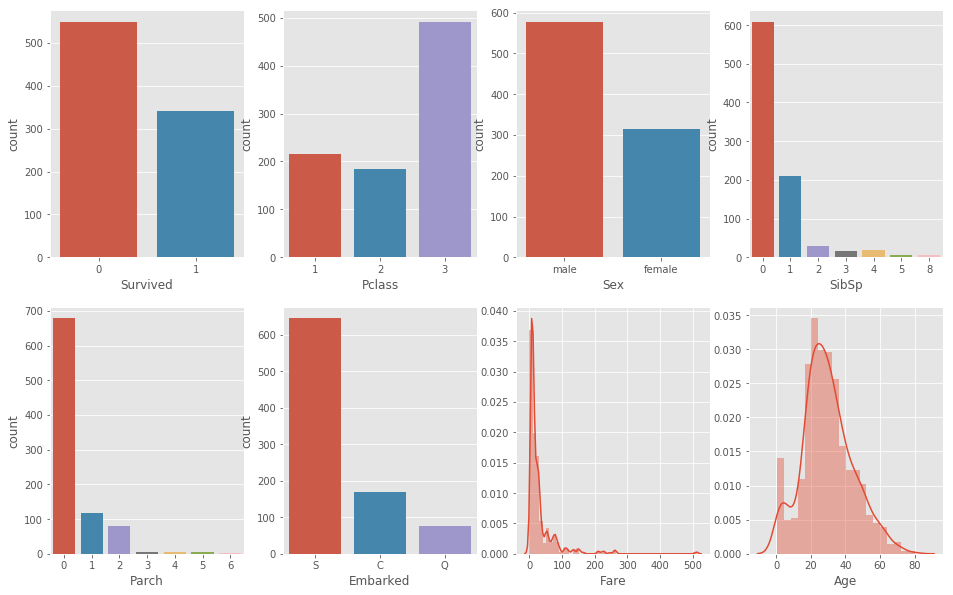

In [22]:
fig , axes = plt.subplots(2, 4, figsize = (16,10) )
sns.countplot('Survived' , data = df, ax = axes[0,0])
sns.countplot('Pclass' , data = df, ax = axes[0,1])
sns.countplot('Sex' , data = df, ax = axes[0,2])
sns.countplot('SibSp' , data = df, ax = axes[0,3])
sns.countplot('Parch' , data = df, ax = axes[1,0])
sns.countplot('Embarked' , data = df, ax = axes[1,1])
sns.distplot(df['Fare'] , kde = True , ax = axes[1,2])
sns.distplot(df['Age'].dropna() , kde = True , ax = axes[1,3])

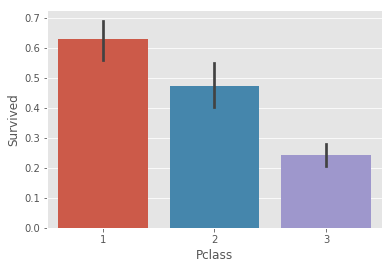

In [36]:
#Pclass
sns.barplot(x='Pclass', y='Survived', data=df)

### Observation
- Pclass is contributing to a persons chance of survival, especially if this person is in class 1

### Bivariate Data Analysis

### Age and Sex

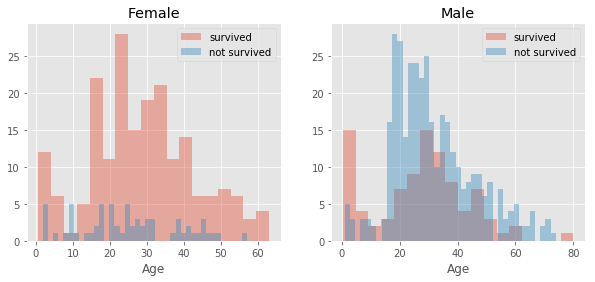

In [30]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_=ax.set_title('Male')

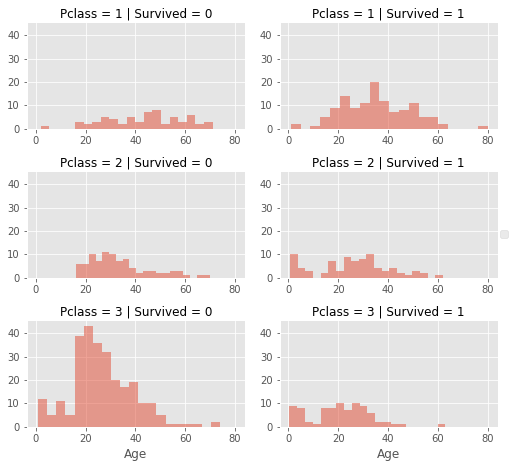

In [38]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

## Observation
- As we can see that men have a high probability of survival when they are between 18 and 30 years old.
-  For women the survival chances are higher between 14 and 40.

### Joint Plot 

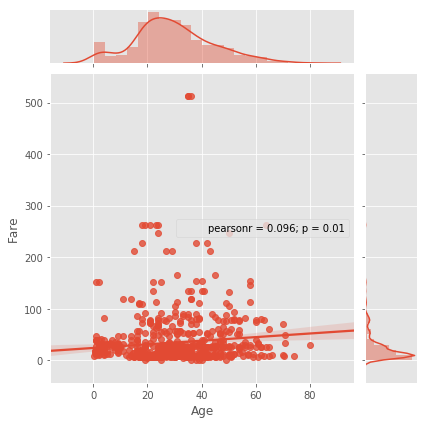

In [31]:
sns.jointplot(x = 'Age' , y = 'Fare' , data = df, kind = 'reg');

## Multivariate Data Analysis



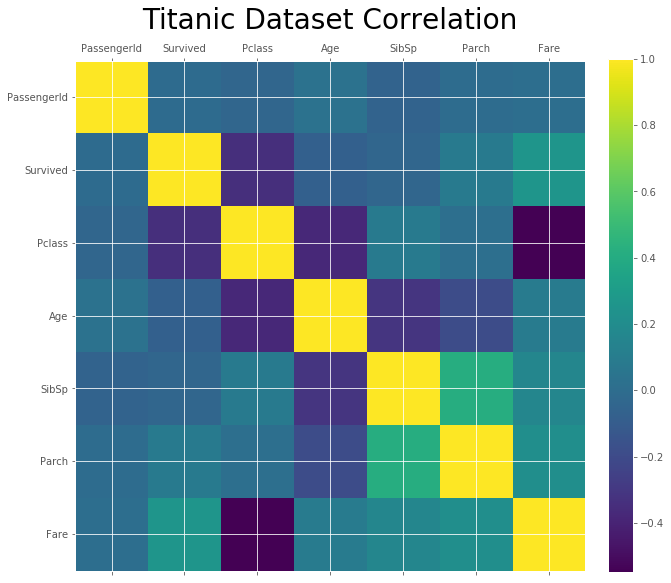

In [39]:
# For multivariate data analysis I've used pandas "correlation matrix" . You can also use seaborn "heatmap".
def plotting_corr( df , size = 10):
    corr = df.corr()
    fig , ax = plt.subplots(figsize = (size,size))
    cax = ax.matshow(corr)
    fig.colorbar(cax, fraction=0.046, pad=0.04)
    plt.title('Titanic Dataset Correlation' , fontsize=28)
    plt.xticks(range(len(corr.columns)) , corr.columns);
    plt.yticks(range(len(corr.columns)) , corr.columns);

plotting_corr(df , size = 10)


### Observation
- There is a positive correlation between Fare and Survived and negative correlation between Pclass and Survived, Fare and Pclass , Age and Pclass.